In [1]:
import numpy as np 
import pandas as pd 
import os
print(os.listdir("/Users/student/Downloads/newges"))

['03', '04', '05', '02', '.DS_Store', '07', '00', '09', '08', '01', '06']


In [2]:
from PIL import Image
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import matplotlib.cm as cm

path='/Users/student/Downloads/newges'
folders=os.listdir(path)
folders=set(folders)

different_classes=os.listdir(path)
different_classes=set(folders)

print("The different classes that exist in this dataset are:")
print(different_classes)

The different classes that exist in this dataset are:
{'07', '05', '00', '03', '01', '04', '.DS_Store', '06', '02', '09', '08'}


In [3]:
x=[]
z=[]
y=[]
threshold=200
import cv2

for i in folders:
    if i=='.DS_Store':
        continue
    print('***',i,'***')
    subject=path+'/'+i
    subdir=os.listdir(subject)
    subdir=set(subdir)
    print(subdir)
    for j in subdir:
        if j=='.DS_Store':
            continue
        images=os.listdir(subject+'/'+j)
        for k in images:
            results=dict()
            results['y']=j.split('_')[0]
            img = cv2.imread(subject+'/'+j+'/'+k,0)
            img=cv2.resize(img,(int(160),int(60)))
            
            ret, imgf = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
            imgD=np.asarray(img,dtype=np.float64)
            z.append(imgD)
            imgf=np.asarray(imgf,dtype=np.float64)
            x.append(imgf)
            y.append(int(j.split('_')[0]))
            results['x']=imgf

*** 07 ***
{'02_l', '05_thumb', '06_index', '08_palm_moved', '04_fist_moved', '01_palm', '10_down', '09_c', '03_fist', '07_ok'}
*** 05 ***
{'02_l', '05_thumb', '06_index', '08_palm_moved', '04_fist_moved', '01_palm', '10_down', '09_c', '03_fist', '07_ok'}
*** 00 ***
{'02_l', '05_thumb', '06_index', '08_palm_moved', '04_fist_moved', '01_palm', '10_down', '09_c', '03_fist', '07_ok'}
*** 03 ***
{'02_l', '05_thumb', '06_index', '08_palm_moved', '04_fist_moved', '01_palm', '10_down', '09_c', '03_fist', '07_ok'}
*** 01 ***
{'02_l', '05_thumb', '06_index', '08_palm_moved', '04_fist_moved', '01_palm', '10_down', '09_c', '03_fist', '07_ok'}
*** 04 ***
{'02_l', '05_thumb', '06_index', '08_palm_moved', '04_fist_moved', '01_palm', '10_down', '09_c', '03_fist', '07_ok'}
*** 06 ***
{'02_l', '05_thumb', '06_index', '08_palm_moved', '04_fist_moved', '01_palm', '10_down', '09_c', '03_fist', '07_ok'}
*** 02 ***
{'02_l', '05_thumb', '06_index', '08_palm_moved', '04_fist_moved', '01_palm', '10_down', '09_

20000
[1000, 1, 1600, 800, 200, 400, 0, 600, 1400, 1200]
Class Label: 1


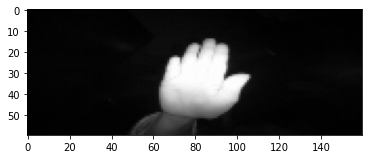

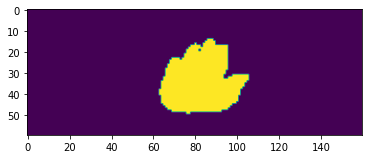

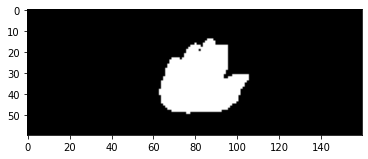

Class Label: 2


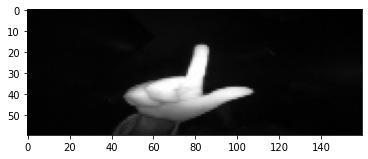

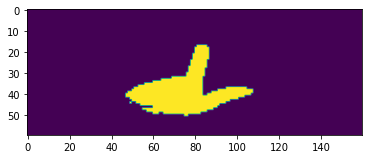

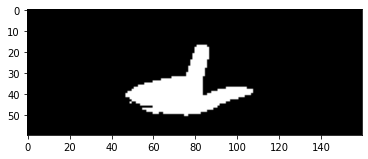

Class Label: 3


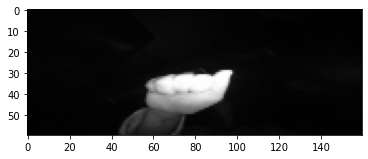

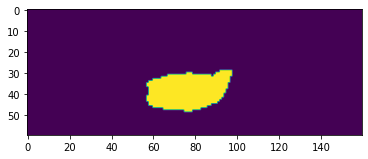

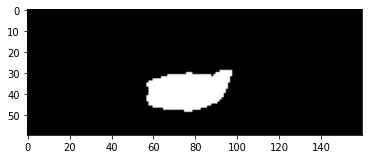

Class Label: 4


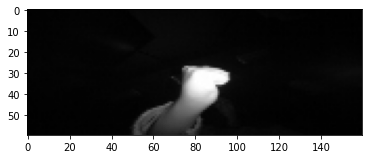

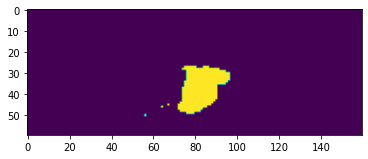

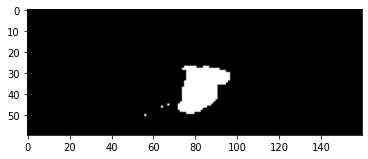

Class Label: 5


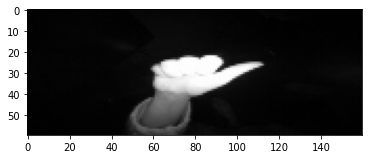

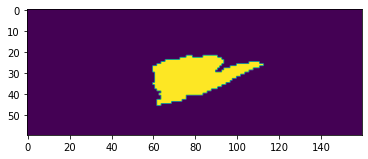

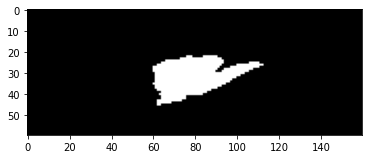

Class Label: 6


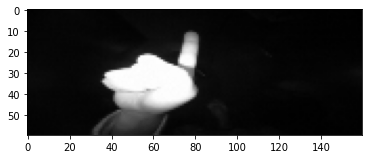

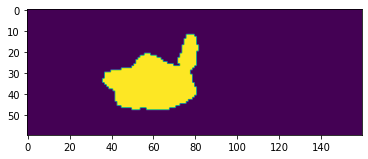

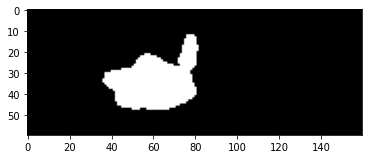

Class Label: 7


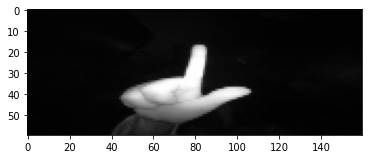

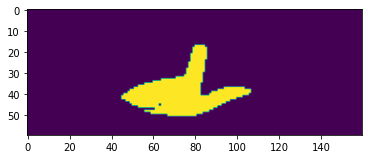

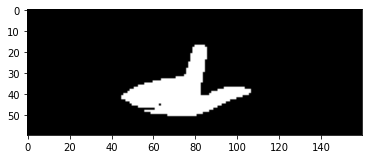

Class Label: 8


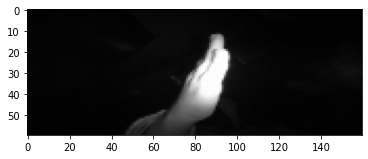

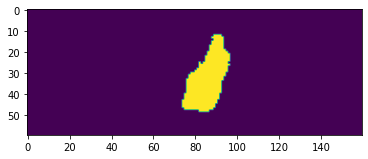

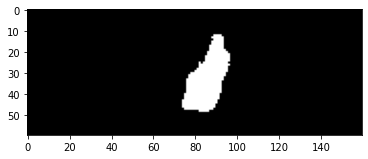

Class Label: 9


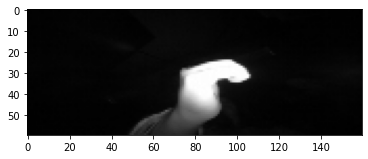

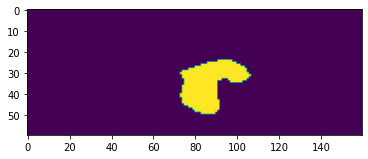

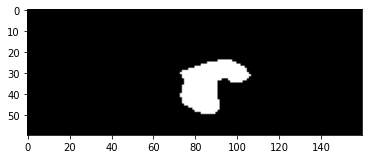

Class Label: 10


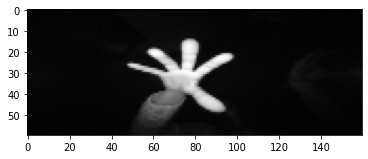

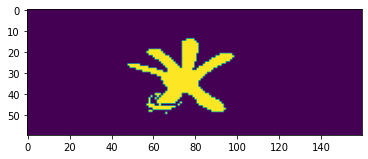

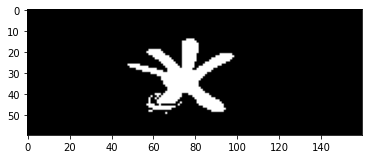

In [4]:
print(len(x))
l = []
list_names = []
for i in range(10):
    l.append(0)
for i in range(len(x)):
    if(l[y[i] - 1] == 0):
        l[y[i] - 1] = i
        if(len(np.unique(l)) == 10):
            break
            
for i in range(len(l)):
    %matplotlib inline
    print("Class Label: " + str(i + 1))
    plt.imshow(np.asarray(z[l[i]]), cmap  =cm.gray)
    plt.show()
    plt.imshow(np.asarray(x[l[i]]))
    plt.show()
    plt.imshow(np.asarray(x[l[i]]), cmap = cm.gray)     
    plt.show() 

In [5]:
x=np.array(x)
y=np.array(y)
y = y.reshape(len(x), 1)
print(x.shape)
print(y.shape)
print(max(y),min(y))

(20000, 60, 160)
(20000, 1)
[10] [1]


In [6]:
x_data = x.reshape((len(x), 60, 160, 1))
x_data/=255
x_data=list(x_data)
for i in range(len(x_data)):
    x_data[i]=x_data[i].flatten()

In [7]:
print(len(x_data))

20000


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y,test_size = 0.2)

In [9]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test = scaler.transform(x_further)

# Ramdom Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
clf_rft = RandomForestClassifier(n_estimators=100, max_depth=15,random_state=0)
clf_rft = clf_rft.fit(X_train, y_train)

<ipython-input-10-a1f37dac80f9>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rft = clf_rft.fit(X_train, y_train)


In [11]:
y_pred_rft=clf_rft.predict(X_test)
y_train_score_rft=clf_rft.predict(X_train)

In [12]:
from sklearn.metrics import accuracy_score
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred_rft, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_rft, normalize=True, sample_weight=None))

accuracy of the model is:
Test  0.9985
Train 1.0


# Detecting Hand

In [13]:
def testing(clf_rft):
    f=[]
    img=Image.open("/Users/student/Desktop/frame_images/image.png")
    plt.imshow(img)
    plt.show()
    img=img.resize((160,60))
    plt.imshow(img)
    plt.show()
    imgf=np.asarray(img,dtype=np.float64)
    f.append(imgf)

    f=np.array(f)
    f_data = f.reshape((len(f), 60, 160, 1))
    f_data/=255
    f_data=list(f_data)

    for i in range(len(f_data)):
        f_data[i]=f_data[i].flatten()
    F_test = f_data
    
    y_pred_dt_img=clf_rft.predict(F_test)
    
    return y_pred_dt_img

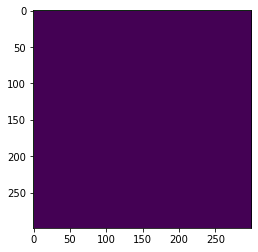

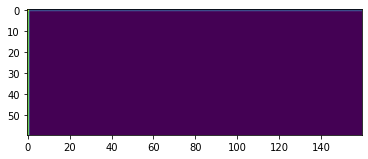

pressed space


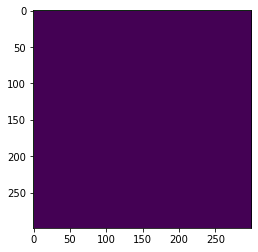

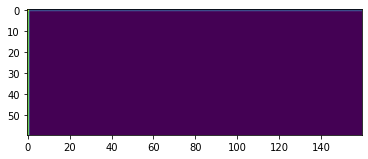

pressed space


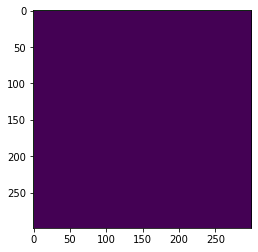

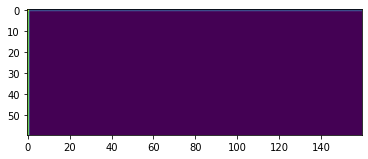

pressed space


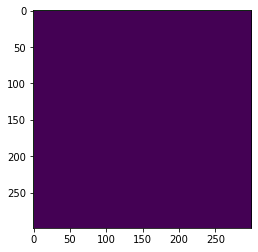

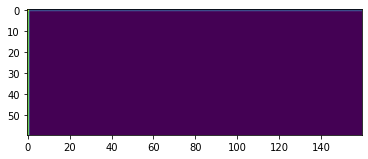

pressed space


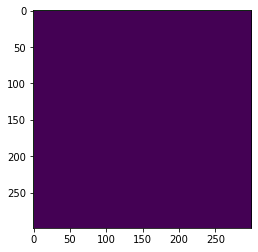

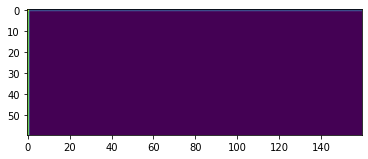

pressed space


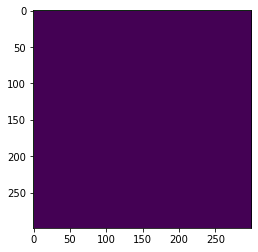

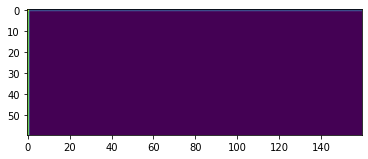

pressed space


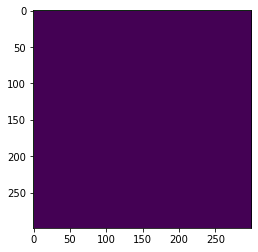

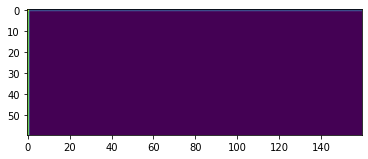

pressed space


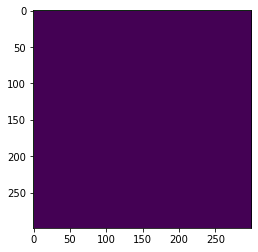

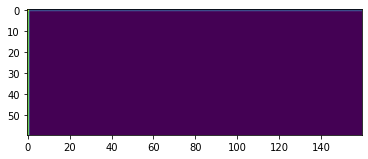

pressed space


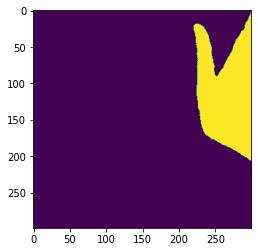

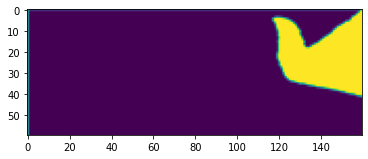

pressed space


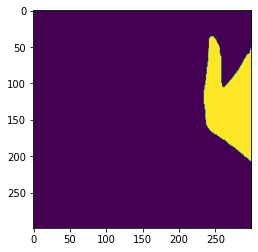

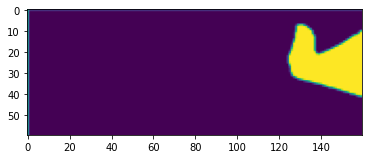

pressed space


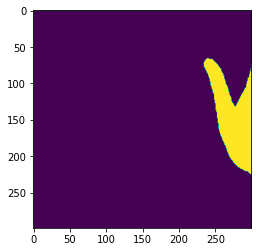

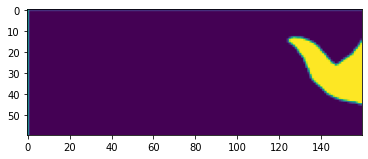

pressed space


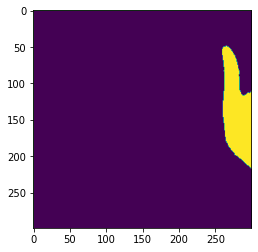

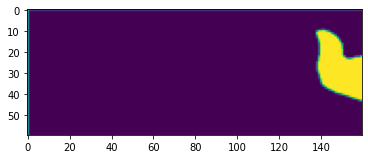

pressed space


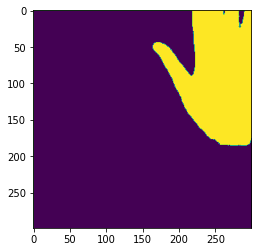

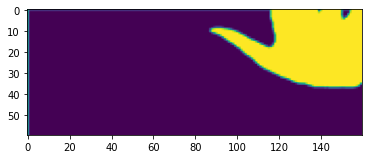

pressed space


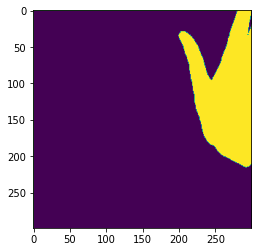

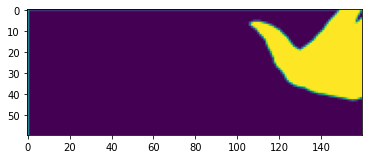

pressed space


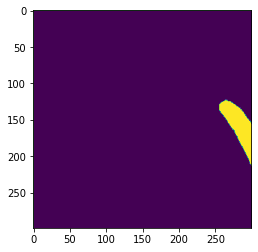

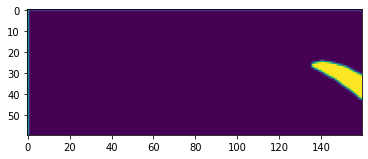

pressed space


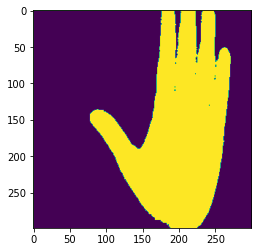

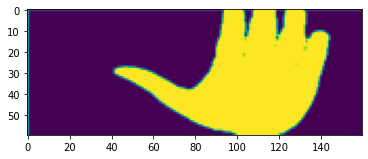

presses right key


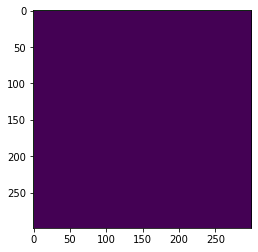

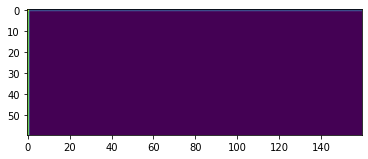

pressed space


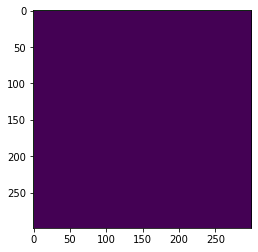

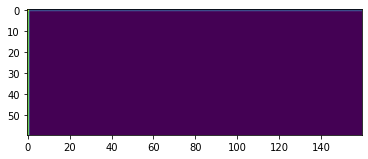

pressed space


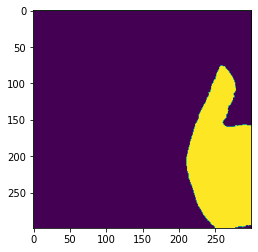

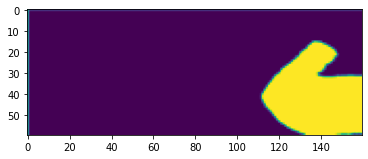

pressed space


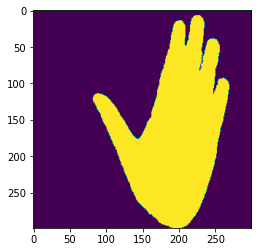

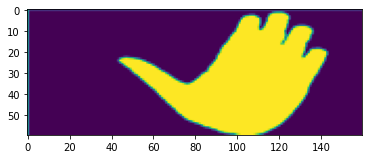

presses right key


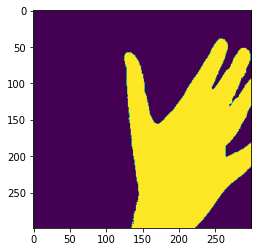

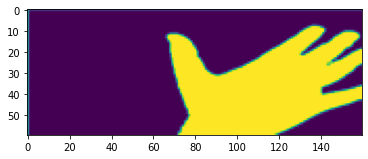

pressed space


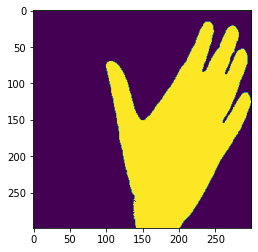

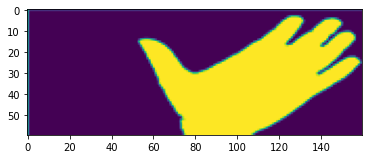

pressed space


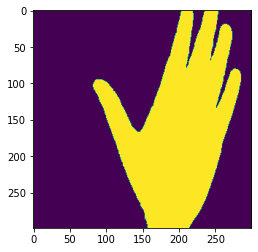

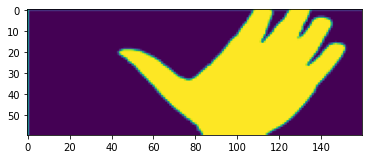

presses right key


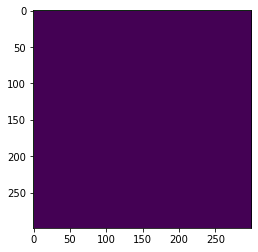

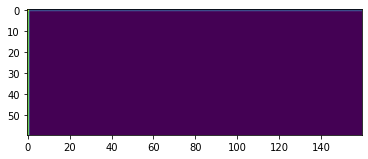

pressed space


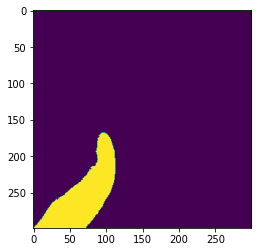

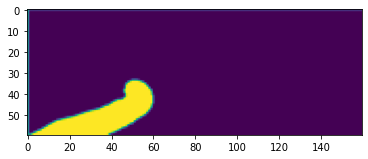

pressed space


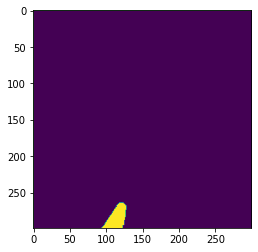

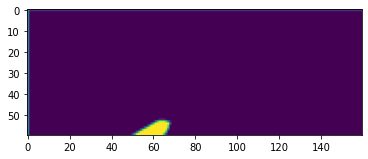

pressed space


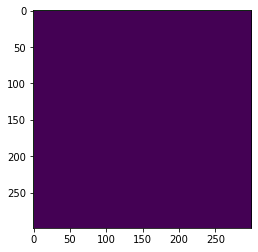

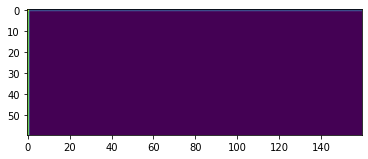

pressed space


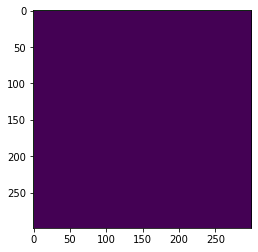

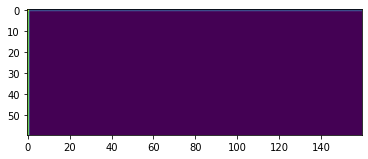

pressed space


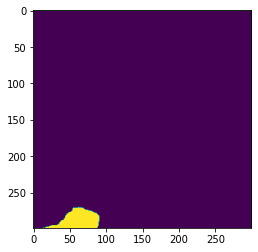

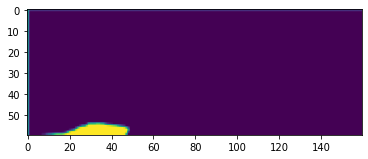

pressed space


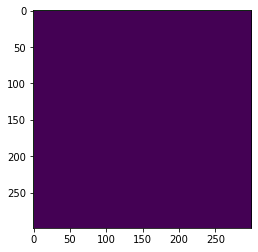

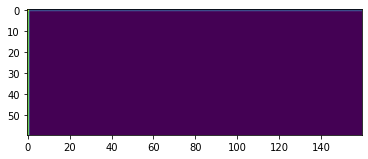

pressed space


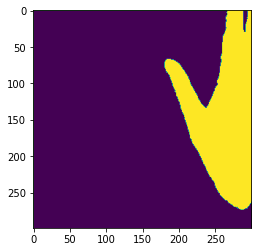

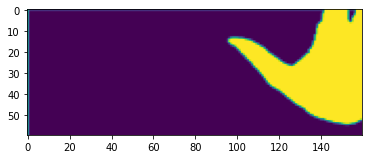

pressed space


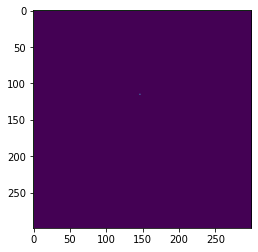

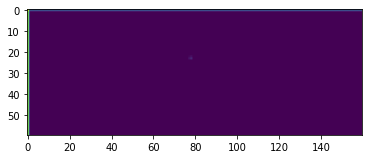

pressed space


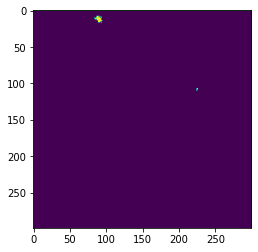

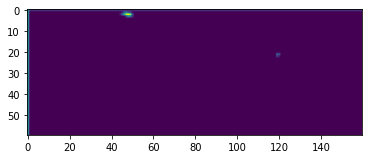

pressed space


KeyboardInterrupt: 

In [14]:
import cv2
import numpy as np 
import math
import pyautogui as p
import time

cap = cv2.VideoCapture(0)
def nothing(x):
    pass

cv2.namedWindow("Color Adjustments",cv2.WINDOW_NORMAL)
cv2.resizeWindow("Color Adjustments", (300, 300)) 
cv2.createTrackbar("Thresh", "Color Adjustments", 0, 255, nothing)

cv2.createTrackbar("Lower_H", "Color Adjustments", 0, 255, nothing)
cv2.createTrackbar("Lower_S", "Color Adjustments", 0, 255, nothing)
cv2.createTrackbar("Lower_V", "Color Adjustments", 0, 255, nothing)
cv2.createTrackbar("Upper_H", "Color Adjustments", 255, 255, nothing)
cv2.createTrackbar("Upper_S", "Color Adjustments", 255, 255, nothing)
cv2.createTrackbar("Upper_V", "Color Adjustments", 255, 255, nothing)


while True:
    _,frame = cap.read()
    frame = cv2.flip(frame,2)
    frame = cv2.resize(frame,(600,500))
    
    cv2.rectangle(frame, (0,1), (300,500), (255, 0, 0), 0)
    crop_image = frame[1:300, 0:300]
    
    hsv = cv2.cvtColor(crop_image, cv2.COLOR_BGR2HSV)

    l_h = cv2.getTrackbarPos("Lower_H", "Color Adjustments")
    l_s = cv2.getTrackbarPos("Lower_S", "Color Adjustments")
    l_v = cv2.getTrackbarPos("Lower_V", "Color Adjustments")

    u_h = cv2.getTrackbarPos("Upper_H", "Color Adjustments")
    u_s = cv2.getTrackbarPos("Upper_S", "Color Adjustments")
    u_v = cv2.getTrackbarPos("Upper_V", "Color Adjustments")

    lower_bound = np.array([l_h, l_s, l_v])
    upper_bound = np.array([u_h, u_s, u_v])
    
    mask = cv2.inRange(hsv, lower_bound, upper_bound)

    filtr = cv2.bitwise_and(crop_image, crop_image, mask=mask)
    
    mask1  = cv2.bitwise_not(mask)
    m_g = cv2.getTrackbarPos("Thresh", "Color Adjustments")
    ret,thresh = cv2.threshold(mask1,m_g,255,cv2.THRESH_BINARY)
    dilata = cv2.dilate(thresh,(3,3),iterations = 6)

    cnts,hier = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    
    try:
        cm = max(cnts, key=lambda x: cv2.contourArea(x))
        epsilon = 0.0005*cv2.arcLength(cm,True)
        data= cv2.approxPolyDP(cm,epsilon,True)

        hull = cv2.convexHull(cm)
        
        cv2.drawContours(crop_image, [cm], -1, (50, 50, 150), 2)
        cv2.drawContours(crop_image, [hull], -1, (0, 255, 0), 2)
        
        hull = cv2.convexHull(cm, returnPoints=False)
        defects = cv2.convexityDefects(cm, hull)
        count_defects = 0
        
        for i in range(defects.shape[0]):
            s,e,f,d = defects[i,0]
           
            start = tuple(cm[s][0])
            end = tuple(cm[e][0])
            far = tuple(cm[f][0])

            a = math.sqrt((end[0] - start[0]) ** 2 + (end[1] - start[1]) ** 2)
            b = math.sqrt((far[0] - start[0]) ** 2 + (far[1] - start[1]) ** 2)
            c = math.sqrt((end[0] - far[0]) ** 2 + (end[1] - far[1]) ** 2)
            angle = (math.acos((b ** 2 + c ** 2 - a ** 2) / (2 * b * c)) * 180) / 3.14

            if angle <= 100:
                count_defects += 1
                cv2.circle(crop_image,far,5,[255,255,255],-1)
           
    except:
        count_defects=0
        pass
    
    img_name = "/Users/student/Desktop/frame_images/image.png"
    
    while(count_defects!=0):
        time.sleep(2)
        cv2.imwrite(img_name, thresh)
        t=testing(clf_rft)
        
        if t[0]==1 or t[0]==3:
            p.press("space")
            print("Paused/Resumed")

        elif t[0]==2 or t[0]==6:
            p.press("right"
            print("Forwarded")

        elif t[0]==8 or t[0]==4:
            p.press("f11")
            print("Reduced Volume")

        elif t[0]==5 or t[0]==9:
            p.press("f12")
            print("Increased Volume")

        elif t[0]==7 or t[0]==10:
            p.press("left")
            print("Backward")
            
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            
        break
            
    cv2.imshow("Thresh", thresh)
    cv2.imshow("filter==",filtr)
    cv2.imshow("Result", frame)
    
    k = cv2.waitKey(1)

    if k == ord('q'): 
        break
    
cap.release()
cv2.destroyAllWindows()